In [1]:
# project: p10
# submitter-netid: awelper
# partner-netid: ajshedivy

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import json
import matplotlib
%matplotlib inline 

In [3]:
from bs4 import BeautifulSoup

In [4]:
import requests, os
import copy

In [5]:
countries=pd.read_json("https://tyler.caraza-harter.com/cs301/spring19/data/countries.json")
countries

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA
5,111370,44.77,0.52,Africa,Liberia,23.10,1000,128.87,"57,5",0.00,"2,3",3042004,SUB-SAHARAN AFRICA
6,504782,10.06,0.98,Europe,Spain,9.72,22000,4.42,"97,9",0.99,"453,5",40397842,WESTERN EUROPE
7,65610,15.51,2.04,Asia,Sri Lanka,6.52,3700,14.35,"92,3",-1.31,"61,5",20222240,ASIA (EX. NEAR EAST)
8,212460,36.24,0.98,Asia,Oman,3.81,13100,19.51,"75,8",0.28,"85,5",3102229,NEAR EAST
9,316,10.22,62.28,Europe,Malta,8.10,17700,3.89,"92,8",2.07,"505,0",400214,WESTERN EUROPE


In [6]:
#q1
countries["area"].sum()

127493303

In [7]:
url = "https://tyler.caraza-harter.com/cs301/spring19/data/capitals/manifest.txt"
r = requests.get(url)
r.raise_for_status()
data = r.text
json_list= data.split("\n")

json_list.pop(-1)
json_list

['Brazil_Peru.json',
 'ElSalvador_SaintHelena.json',
 'Ghana_Belize.json',
 'Palau_Nigeria.json',
 'Portugal_Somalia.json',
 'Seychelles_Cuba.json',
 'Slovenia_Estonia.json',
 'Tanzania_Swaziland.json',
 'Vanuatu_Tajikistan.json']

In [8]:
#q2
json_list[0]

'Brazil_Peru.json'

In [9]:
def get_json(path):
    url = "https://tyler.caraza-harter.com/cs301/spring19/data/capitals/" + path
    #path="C:\Users\Owner\Documents\CS 301\p10"
    if not os.path.exists(path):
        r = requests.get(url)
        r.raise_for_status()
        data = r.json()
        f=open(path, "w")
        json.dump(data, f)
        f.close()
        return data
    else:
        f=open(path, "r")
        content = json.load(f)
        f.close()
        return content

In [10]:
get_json("Brazil_Peru.json")

[{'capital': 'Brasilia',
  'country': 'Brazil',
  'latitude': -15.783333333333333,
  'longitude': -47.916667},
 {'capital': 'Nouakchott',
  'country': 'Mauritania',
  'latitude': 18.066666666666666,
  'longitude': -15.966667000000001},
 {'capital': 'Bern',
  'country': 'Switzerland',
  'latitude': 46.91666666666666,
  'longitude': 7.466667},
 {'capital': 'Zagreb',
  'country': 'Croatia',
  'latitude': 45.8,
  'longitude': 16.0},
 {'capital': 'Cairo',
  'country': 'Egypt',
  'latitude': 30.05,
  'longitude': 31.25},
 {'capital': 'Sanaa',
  'country': 'Yemen',
  'latitude': 15.35,
  'longitude': 44.2},
 {'capital': 'Helsinki',
  'country': 'Finland',
  'latitude': 60.16666666666666,
  'longitude': 24.933332999999998},
 {'capital': 'Addis Ababa',
  'country': 'Ethiopia',
  'latitude': 9.033333333333333,
  'longitude': 38.7},
 {'capital': 'Prague',
  'country': 'Czech Republic',
  'latitude': 50.08333333333334,
  'longitude': 14.466667000000001},
 {'capital': 'Maseru',
  'country': 'Lesoth

In [12]:
#q3
capital_rows=[]
for file in json_list:
    capitals=get_json(file)
    capital_rows+=capitals
#capitals=DataFrame(capital_rows)
capital_rows

[{'capital': 'Brasilia',
  'country': 'Brazil',
  'latitude': -15.783333333333333,
  'longitude': -47.916667},
 {'capital': 'Nouakchott',
  'country': 'Mauritania',
  'latitude': 18.066666666666666,
  'longitude': -15.966667000000001},
 {'capital': 'Bern',
  'country': 'Switzerland',
  'latitude': 46.91666666666666,
  'longitude': 7.466667},
 {'capital': 'Zagreb',
  'country': 'Croatia',
  'latitude': 45.8,
  'longitude': 16.0},
 {'capital': 'Cairo',
  'country': 'Egypt',
  'latitude': 30.05,
  'longitude': 31.25},
 {'capital': 'Sanaa',
  'country': 'Yemen',
  'latitude': 15.35,
  'longitude': 44.2},
 {'capital': 'Helsinki',
  'country': 'Finland',
  'latitude': 60.16666666666666,
  'longitude': 24.933332999999998},
 {'capital': 'Addis Ababa',
  'country': 'Ethiopia',
  'latitude': 9.033333333333333,
  'longitude': 38.7},
 {'capital': 'Prague',
  'country': 'Czech Republic',
  'latitude': 50.08333333333334,
  'longitude': 14.466667000000001},
 {'capital': 'Maseru',
  'country': 'Lesoth

In [13]:
capitals=DataFrame(capital_rows)
capitals

,capital,country,latitude,longitude
0,Brasilia,Brazil,-15.783333,-47.916667
1,Nouakchott,Mauritania,18.066667,-15.966667
2,Bern,Switzerland,46.916667,7.466667
3,Zagreb,Croatia,45.800000,16.000000
4,Cairo,Egypt,30.050000,31.250000
5,Sanaa,Yemen,15.350000,44.200000
6,Helsinki,Finland,60.166667,24.933333
7,Addis Ababa,Ethiopia,9.033333,38.700000
8,Prague,Czech Republic,50.083333,14.466667
9,Maseru,Lesotho,-29.316667,27.483333


In [14]:
#q4

df = capitals.set_index("country")
#print(df)
countryidx = df.loc["Bermuda"]
countryidx["capital"]

'Hamilton'

In [15]:
#q5
df_capitals = capitals.set_index("capital")
series_Maputo = df_capitals.loc["Maputo"]
series_Maputo["country"]

'Mozambique'

In [16]:
#q6
long_df_south = capitals.sort_values(by = ["latitude"])
country_df = long_df_south.set_index("country")
top_five = long_df_south[:5]
list(top_five["country"])

['New Zealand', 'Australia', 'Uruguay', 'Argentina', 'Chile']

In [17]:
#q7
long_df_north = capitals.sort_values(by = "latitude", ascending = False)
top_three = long_df_north[:3]
list(top_three["country"])

['Iceland', 'Finland', 'Norway']

In [18]:
#q8
countries[["birth-rate", "death-rate"]].describe()


,birth-rate,death-rate
count,175.000000,175.000000
mean,22.536114,9.654971
std,11.287090,5.187216
min,8.250000,2.410000
25%,12.635000,6.075000
50%,20.340000,8.230000
75%,30.200000,11.965000
max,50.730000,29.740000


In [19]:
countries

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA
5,111370,44.77,0.52,Africa,Liberia,23.10,1000,128.87,"57,5",0.00,"2,3",3042004,SUB-SAHARAN AFRICA
6,504782,10.06,0.98,Europe,Spain,9.72,22000,4.42,"97,9",0.99,"453,5",40397842,WESTERN EUROPE
7,65610,15.51,2.04,Asia,Sri Lanka,6.52,3700,14.35,"92,3",-1.31,"61,5",20222240,ASIA (EX. NEAR EAST)
8,212460,36.24,0.98,Asia,Oman,3.81,13100,19.51,"75,8",0.28,"85,5",3102229,NEAR EAST
9,316,10.22,62.28,Europe,Malta,8.10,17700,3.89,"92,8",2.07,"505,0",400214,WESTERN EUROPE


In [20]:
#q9
df_phl = countries[["phones", "literacy"]]    #phl = "phones and literacy"
phones = df_phl["phones"]
literacy = df_phl["literacy"]
comma_list2 = list(literacy)
comma_list = list(phones)
for item in comma_list:
    comma_list = [c.replace(',', '.') for c in comma_list]
    #print(comma_list)
    
for item in comma_list2:
     comma_list2 = [c.replace(',', '.') for c in comma_list2]
        

ser_phones = Series(comma_list)   #series of phones 
floaty_phones = ser_phones.astype(dtype = "float") #convert data type to float

ser_literacy = Series(comma_list2) #series of litercy 
floaty_literacy =  ser_literacy.astype(dtype = "float")   #convert data type to float

something = DataFrame({'phones': floaty_phones, 'literacy': floaty_literacy})
something.describe()

,phones,literacy
count,175.000000,175.000000
mean,214.621143,82.182286
std,218.613971,20.086897
min,1.300000,17.600000
25%,31.300000,69.950000
50%,140.100000,92.000000
75%,329.700000,98.000000
max,1035.600000,100.000000


In [21]:
#q10
coast = countries[["coastline", "area", "country", "continent"]]
coast_sorted = coast.sort_values(by = "coastline")
land_lock = coast_sorted[coast_sorted.coastline == 0]
europe = land_lock[land_lock.continent == "Europe"]
deluca = europe.sort_values(by = "area", ascending = False)
deluca["country"].iloc[0]


'Belarus'

In [22]:
#q11
coast = countries[["coastline", "area", "country", "continent"]]
sorted_by_coast = coast.sort_values(by = "coastline")
land_lock = sorted_by_coast[sorted_by_coast.coastline == 0]
africa = land_lock[land_lock.continent == "Africa"]
africa.sort_values(by = "area", ascending = False)["country"].iloc[0]

'Chad'

In [23]:
#q12
south_america =  land_lock[land_lock.continent == "South America"]
south_america.sort_values(by = "area", ascending = False)["country"].iloc[0]

'Bolivia'

In [24]:

# randall
lat1 = 43.070231
lon1 = -89.411893
#capital 
lat2 = 43.074645
lon2 = -89.384113


from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) # descimal to radians

    # haversine formula from link  
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # radius of earth in miles 
    distance =  c * r
    return distance

In [25]:
#q13
haversine(lon1, lat1, lon2, lat2)

1.433899492072933

In [26]:
"""
capitals 
tdata = capitals.set_index('country')
bdata = tdata.loc["Brazil"]   #bdata = brazil data
lat1 = bdata['latitude']
lon1 = bdata["longitude"]

idata = t.loc["India"]   #idata = india data
lat2 = idata["latitude"]
lon2 = idata["longitude"]
# from india to brazil (lon, lat)



c1 = "India"
c2 = "Brazil"
tdata = capitals.set_index("country")
c1_data = tdata.loc[c1]
lon1 = c1_data['longitude']
lat1 = c1_data['latitude']
    
c2_data = tdata.loc[c2]
lon2 = c2_data['longitude']
lat2 = c2_data['latitude']
print(c1_data)
print(c2_data)

haversine(lon1, lat1, lon2, lat2)
"""

'\ncapitals \ntdata = capitals.set_index(\'country\')\nbdata = tdata.loc["Brazil"]   #bdata = brazil data\nlat1 = bdata[\'latitude\']\nlon1 = bdata["longitude"]\n\nidata = t.loc["India"]   #idata = india data\nlat2 = idata["latitude"]\nlon2 = idata["longitude"]\n# from india to brazil (lon, lat)\n\n\n\nc1 = "India"\nc2 = "Brazil"\ntdata = capitals.set_index("country")\nc1_data = tdata.loc[c1]\nlon1 = c1_data[\'longitude\']\nlat1 = c1_data[\'latitude\']\n    \nc2_data = tdata.loc[c2]\nlon2 = c2_data[\'longitude\']\nlat2 = c2_data[\'latitude\']\nprint(c1_data)\nprint(c2_data)\n\nhaversine(lon1, lat1, lon2, lat2)\n'

In [27]:
tdata = capitals.set_index('country')
#print(tdata)

def better_haversine(c1, c2):
    tdata = capitals.set_index("country")
    c1_data = tdata.loc[c1]
    lon1 = c1_data['longitude']
    lat1 = c1_data['latitude']
    
    c2_data = tdata.loc[c2]
    lon2 = c2_data['longitude']
    lat2 = c2_data['latitude']
    
    if c1 == c2:
        return "NaN"
    
    
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) # descimal to radians

    # haversine formula from link  
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # radius of earth in miles 
    distance =  c * r
    return distance

In [28]:
#q14
better_haversine("India", "Brazil")

8840.574141306946

In [29]:
def co_list(c1, c2, c3): # not used 
    x = better_haversine(c1, c2)
    y = better_haversine(c1, c3)
    z = better_haversine(c2, c3)
    print("distance" + " " + "bw" + " " + str(c1) + "-" + str(c2) + ":" + " " + str(x))
    print("distance" + " " + "bw" + " " + str(c1) + "-" + str(c3) + ":" + " " + str(y))
    print("distance" + " " + "bw" + " " + str(c2) + "-" + str(c3) + ":" + " " + str(z))

In [30]:
co_list("Chile", "Guyana", "Colombia")

distance bw Chile-Guyana: 2897.5530949080326
distance bw Chile-Colombia: 2636.6445991563364
distance bw Guyana-Colombia: 1105.0663119835597


In [31]:
def co_list2(c1, c2, c3):    
    x = better_haversine(c1, c2)
    y = better_haversine(c1, c3)
    z = better_haversine(c2, c3)
    data = {str(c1): [better_haversine(c1, c1), better_haversine(c1, c2), better_haversine(c1, c3)], 
            str(c2): [better_haversine(c2, c1), better_haversine(c2, c2), better_haversine(c2, c3)],
            str(c3): [better_haversine(c3, c1), better_haversine(c3, c2), better_haversine(c3, c3)]}
    df = pd.DataFrame(data, index = [str(c1), str(c2), str(c3)])
    return df 

In [32]:
#q15
co_list2("Chile", "Guyana", "Colombia")

,Chile,Guyana,Colombia
Chile,NaN,2897.55,2636.64
Guyana,2897.55,NaN,1105.07
Colombia,2636.64,1105.07,NaN


In [33]:
country_cont_l = countries[["country", "continent"]]
country_df = country_cont_l[country_cont_l.continent == "South America"]
sa_clist = list(country_df["country"])
sa_clist

['Chile',
 'Guyana',
 'Colombia',
 'Suriname',
 'Brazil',
 'Bolivia',
 'Venezuela',
 'Argentina',
 'Peru',
 'Ecuador',
 'Uruguay',
 'Paraguay']

In [34]:
def big_frame(clist):
    data_dict = {}
    for idx1 in range(len(clist)):
        data_dict[clist[idx1]]=[]
        for idx2 in range(len(clist)):
            data_dict[clist[idx1]].append(better_haversine(clist[idx1], clist[idx2]))
        sa_df = pd.DataFrame(data_dict, index = clist)
    return sa_df
        
    

In [35]:
#q16
big_frame(sa_clist)

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2897.55,2636.64,2895.81,1869.74,1180.74,3043.66,690.784,1531.48,2350.21,833.403,963.636
Guyana,2897.55,NaN,1105.07,215.336,1709.07,1747.77,646.97,2857.52,1837.86,1483.19,2878.64,2214.29
Colombia,2636.64,1105.07,NaN,1303.41,2275.52,1512.12,639.361,2885.36,1167.51,451.004,2962.23,2337.62
Suriname,2895.81,215.336,1303.41,NaN,1572.67,1778.77,861.457,2799.89,1944.75,1661.7,2809.74,2153.86
Brazil,1869.74,1709.07,2275.52,1572.67,NaN,1342.3,2228.69,1459.14,1967.77,2344.58,1412.1,908.186
Bolivia,1180.74,1747.77,1512.12,1778.77,1342.3,NaN,1865.13,1379.46,669.926,1326.76,1467.25,906.799
Venezuela,3043.66,646.97,639.361,861.457,2228.69,1865.13,NaN,3157.62,1705.42,1088.06,3207.35,2544.8
Argentina,690.784,2857.52,2885.36,2799.89,1459.14,1379.46,3157.62,NaN,1936.47,2696.15,143.07,646.036
Peru,1531.48,1837.86,1167.51,1944.75,1967.77,669.926,1705.42,1936.47,NaN,823.054,2046.57,1558.64
Ecuador,2350.21,1483.19,451.004,1661.7,2344.58,1326.76,1088.06,2696.15,823.054,NaN,2791.2,2218.65


In [36]:
#q17
sa_dist=big_frame(sa_clist)
sa_dist
sa_distint=sa_dist.replace("NaN", 10000)
ave_dist={}
country_dist={}
for country in sa_clist:
    s=list(pd.Series(sa_distint[country]).values)
    country_dist[country]=s 
    average=sum(s)/len(s)
    ave_dist[country]=average
average = Series(ave_dist)
low_avg = average.sort_values(ascending = True)
low_avg.index[0]

'Bolivia'

In [37]:
#q18
low_avg.index[-1]

'Uruguay'

In [38]:
#q19
distance=pd.DataFrame(sa_distint).min()
nearestidx=pd.DataFrame(sa_distint).idxmin()
data_sa_d= {'distance' :distance,
            'nearest' : nearestidx}
near_df = pd.DataFrame(data_sa_d)
near_df

,distance,nearest
Chile,690.784168,Argentina
Guyana,215.336336,Suriname
Colombia,451.004119,Ecuador
Suriname,215.336336,Guyana
Brazil,908.185709,Paraguay
Bolivia,669.926372,Peru
Venezuela,639.361118,Colombia
Argentina,143.069943,Uruguay
Peru,669.926372,Bolivia
Ecuador,451.004119,Colombia


In [39]:
#q20
max_sadist= sa_dist.replace("NaN", 0)
distance=pd.DataFrame(max_sadist).max()
furthestidx=pd.DataFrame(max_sadist).idxmax()
data_sa_d= {'distance' :distance,
            'furthest' : furthestidx}
far_df = pd.DataFrame(data_sa_d)
far_df


,distance,furthest
Chile,3043.657689,Venezuela
Guyana,2897.553095,Chile
Colombia,2962.230943,Uruguay
Suriname,2895.810776,Chile
Brazil,2344.584922,Ecuador
Bolivia,1865.131181,Venezuela
Venezuela,3207.352176,Uruguay
Argentina,3157.624051,Venezuela
Peru,2046.571589,Uruguay
Ecuador,2791.196721,Uruguay


In [40]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)
# remember to do conn.close() at the end of your notebook

In [41]:
#q21
query = """
select continent, count(*) as `number of countries`
from countries
group by continent
order by `number of countries`"""
num_countries = pd.read_sql(query, conn)
num_countries 

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,48


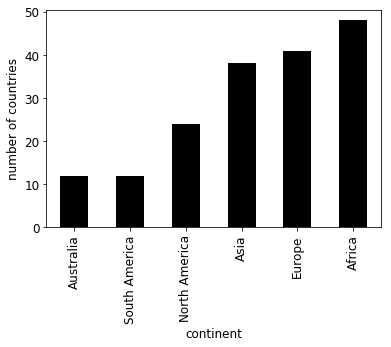

In [42]:
#q22
ax= num_countries.plot.bar(color="black", legend=None, fontsize=12)
ax.set_xlabel("continent", fontsize= 12)
ax.set_ylabel("number of countries", fontsize=12)
ax.set_xticklabels(num_countries["continent"])
ax

In [43]:
#q23
query="""
select continent, sum(population/1000000.0) as `total population (million)`
from countries
group by continent
order by`total population (million)` DESC
 """
continent_pop = pd.read_sql(query, conn)
continent_pop

,continent,total population (million)
0,Asia,3739.902863
1,Africa,824.954038
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


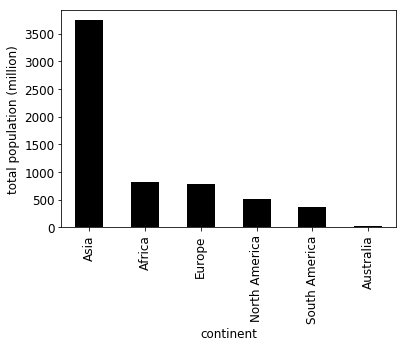

In [44]:
#q24
ax= continent_pop.plot.bar(color="black", legend=None, fontsize=12)
ax.set_xlabel("continent", fontsize=12)
ax.set_ylabel("total population (million)", fontsize=12)
ax.set_xticklabels(continent_pop["continent"])
ax

In [45]:
#q25
query= """
select country, sum(population) as `population`
from countries
where continent = "Australia"
group by country
order by`population` DESC
"""
australia_pop = pd.read_sql(query, conn)
australia_pop

,country,population
0,Australia,20264082
1,Papua New Guinea,5670544
2,New Zealand,4076140
3,Fiji,905949
4,French Polynesia,274578
5,New Caledonia,219246
6,Vanuatu,208869
7,Samoa,176908
8,Guam,171019
9,Tonga,114689


In [46]:
#q26
query= """
select country, (population * `gdp-per-capita`)/1000000000.0 as `real GDP (billion)`
from countries
group by country
order by `real GDP (billion)` DESC
limit 10
"""
high_gdp = pd.read_sql(query, conn)
high_gdp

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


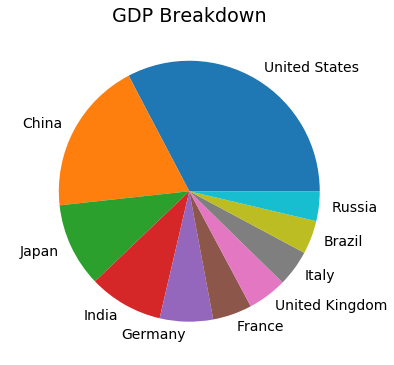

In [47]:
#q27
actual_gdp = high_gdp.set_index("country")
matplotlib.rcParams["font.size"]=16
ax=actual_gdp.plot.pie(y="real GDP (billion)", legend=None, label=' ', title= "GDP Breakdown", fontsize=14, figsize=(6,6))

In [48]:
#q28
query= """
select country, `birth-rate`, `death-rate` 
from countries
group by country
order by `birth-rate`-`death-rate` DESC
limit 10
"""
high_gap = pd.read_sql(query, conn)
high_gap

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


              birth-rate  death-rate
country                             
Uganda             47.35       12.24
Yemen              42.89        8.30
Mali               49.82       16.89
Oman               36.24        3.81
Madagascar         41.41       11.11
Burkina Faso       45.62       15.60
Niger              50.73       20.91
Chad               45.73       16.38
Mauritania         40.99       12.16
Burundi            42.22       13.46


Text(0.5, 0, 'rate')

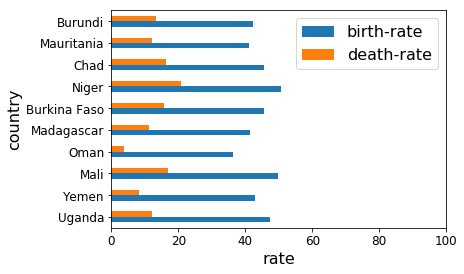

In [66]:
#q29
the_high_gap=high_gap.set_index("country")
print(the_high_gap)
ax=the_high_gap.plot.barh(fontsize=12, xlim=(0,100))
ax.set_xlabel("rate")

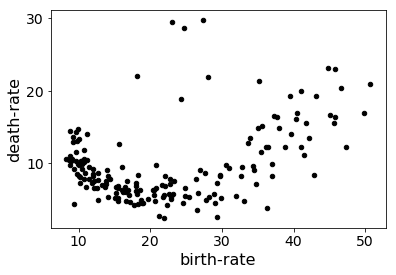

In [50]:
#q30
query= """
select country, `birth-rate`, `death-rate` 
from countries
group by country
order by `birth-rate`-`death-rate` DESC
"""
all_gap = pd.read_sql(query, conn)
matplotlib.rcParams["font.size"]=16
all_gap.plot.scatter(x="birth-rate", y="death-rate", color="black", fontsize=14)

In [51]:
#q31
query= """
select country, `birth-rate`, `death-rate` 
from countries
where `birth-rate`<30 and `death-rate`>16
group by country
order by `birth-rate`
"""
outlier = pd.read_sql(query, conn)
outlier

,country,birth-rate,death-rate
0,South Africa,18.20,22.00
1,Botswana,23.08,29.50
2,Namibia,24.32,18.86
3,Lesotho,24.75,28.71
4,Swaziland,27.41,29.74
5,Zimbabwe,28.01,21.84


In [52]:
#q32
all_gap.corr()["birth-rate"]["death-rate"]

0.40037782919521714

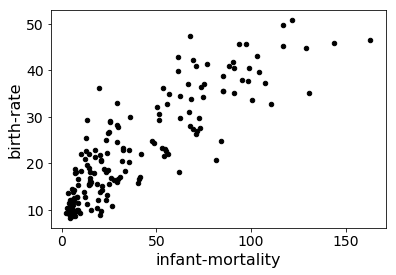

In [53]:
#q33
query= """
select country, `birth-rate`, `infant-mortality` 
from countries
group by country
"""
birth_mortality = pd.read_sql(query, conn)
matplotlib.rcParams["font.size"]=16
birth_mortality.plot.scatter(y="birth-rate", x="infant-mortality", color="black", fontsize=14)

In [54]:
#q34
birth_mortality.corr()["birth-rate"]["infant-mortality"]

0.8687265678031411

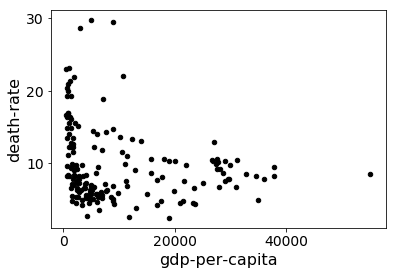

In [55]:
#q35
query= """
select country, `gdp-per-capita`, `death-rate` 
from countries
group by country
"""
death_gdp = pd.read_sql(query, conn)
matplotlib.rcParams["font.size"]=16
death_gdp.plot.scatter(y="death-rate", x="gdp-per-capita", color="black", fontsize=14)

In [56]:
#q36
death_gdp.corr()["gdp-per-capita"]["death-rate"]

-0.20995846867456763

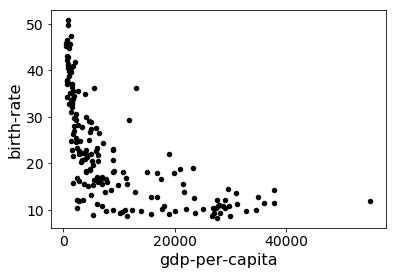

In [57]:
#q37
query= """
select country, `gdp-per-capita`, `birth-rate` 
from countries
group by country
"""
birth_gdp = pd.read_sql(query, conn)
matplotlib.rcParams["font.size"]=16
birth_gdp.plot.scatter(y="birth-rate", x="gdp-per-capita", color="black", fontsize=14)

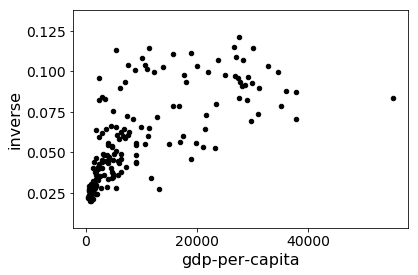

In [58]:
#q38
query= """
select country, `gdp-per-capita`, 1/"birth-rate" as`inverse` 
from countries
group by country
"""
invbirth_gdp = pd.read_sql(query, conn)
matplotlib.rcParams["font.size"]=16
inv_plot=invbirth_gdp.plot.scatter(y="inverse", x="gdp-per-capita", color="black", fontsize=14)
inv_plot

In [62]:
#q39
import numpy as np

df = invbirth_gdp
df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
slope = coefficients[0] # slope
intercept = coefficients[1] # intercept
(slope,intercept)

(1.8422394400496343e-06, 0.039035043649535354)

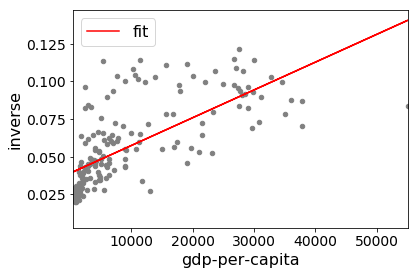

In [60]:
#q40
matplotlib.rcParams["font.size"]=16
ax = df.plot.scatter(x='gdp-per-capita', y='inverse', color="gray", fontsize=14)

df["fit"] = df["gdp-per-capita"] * slope + intercept
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)
inv_plot